(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

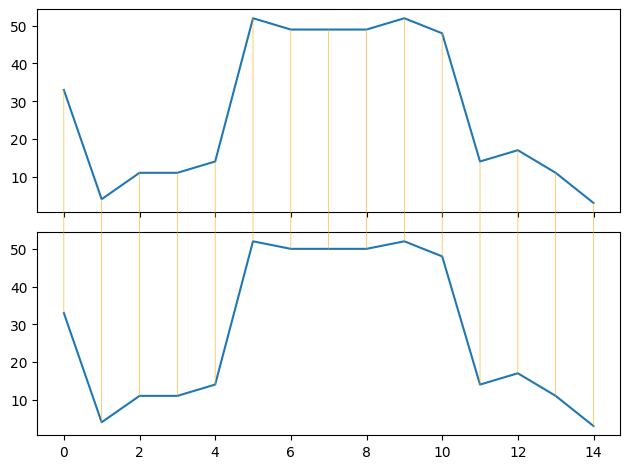

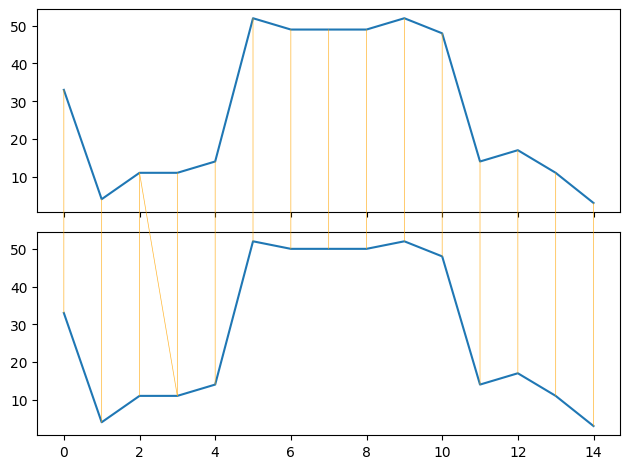

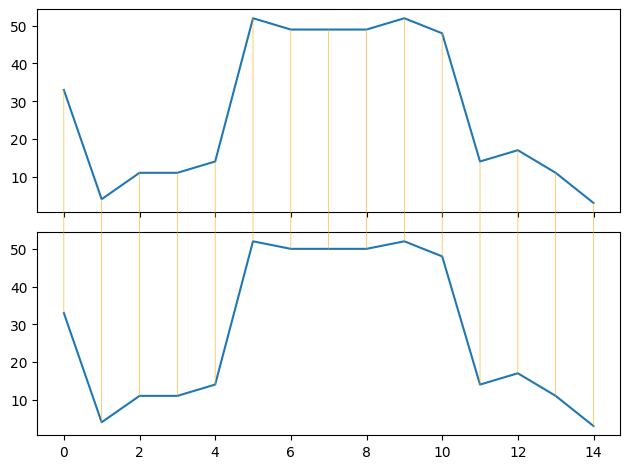

In [27]:
source = "Hello XXX World"
target = "Hello YYY World"

import numpy as np
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

from utils import extract_erp_path, extacted_twed_path

# Character mapping
char_map = {char: idx for idx, char in enumerate("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ ")}


# Function to convert a string into a sequence of integers along with timestamps
def encode_string_with_timestamps(s, char_map):
    encoded = np.array([char_map[char] for char in s], dtype=np.float32)
    timestamps = np.arange(1, len(s) + 1)  # Assigning sequential timestamps
    return encoded, timestamps


# Encode the two strings with timestamps
s1, t1 = encode_string_with_timestamps(source, char_map)
s2, t2 = encode_string_with_timestamps(target, char_map)

nu = 1.0  # Elasticity parameter
lamb = 0.5  # Gap penalty


# Compute DTW warping path
path = dtw.warping_path(s1, s2)
erp_path = extract_erp_path(s1, s2)
twed_path =extacted_twed_path(s1, t1, s2, t2, nu, lamb)




dtwvis.plot_warping(s1, s2, path)
dtwvis.plot_warping(s1, s2, erp_path)
dtwvis.plot_warping(s1, s2, twed_path)



(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

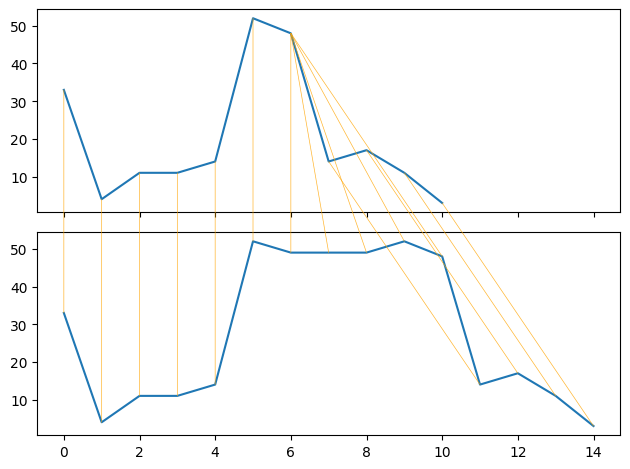

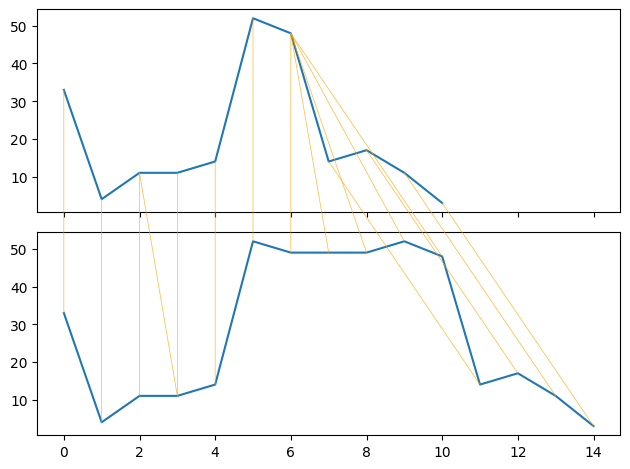

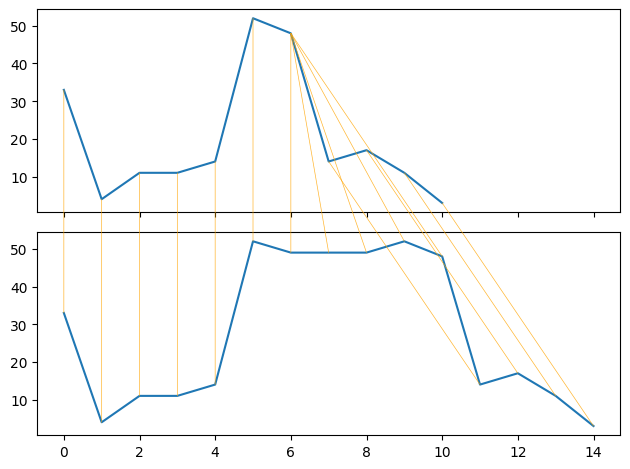